In [4]:
import os
import joblib
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier, IsolationForest
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import cross_val_score

In [2]:
import pandas as pd
df = pd.read_csv('/kaggle/input/darwin-handwriting-based-survey/DARWIN.csv')

In [3]:
df.head()


,ID,air_time1,disp_index1,gmrt_in_air1,gmrt_on_paper1,max_x_extension1,max_y_extension1,mean_acc_in_air1,mean_acc_on_paper1,mean_gmrt1,...,mean_jerk_in_air25,mean_jerk_on_paper25,mean_speed_in_air25,mean_speed_on_paper25,num_of_pendown25,paper_time25,pressure_mean25,pressure_var25,total_time25,class
0,id_1,5160,0.000013,120.804174,86.853334,957,6601,0.361800,0.217459,103.828754,...,0.141434,0.024471,5.596487,3.184589,71,40120,1749.278166,296102.7676,144605,P
1,id_2,51980,0.000016,115.318238,83.448681,1694,6998,0.272513,0.144880,99.383459,...,0.049663,0.018368,1.665973,0.950249,129,126700,1504.768272,278744.2850,298640,P
2,id_3,2600,0.000010,229.933997,172.761858,2333,5802,0.387020,0.181342,201.347928,...,0.178194,0.017174,4.000781,2.392521,74,45480,1431.443492,144411.7055,79025,P
3,id_4,2130,0.000010,369.403342,183.193104,1756,8159,0.556879,0.164502,276.298223,...,0.113905,0.019860,4.206746,1.613522,123,67945,1465.843329,230184.7154,181220,P
4,id_5,2310,0.000007,257.997131,111.275889,987,4732,0.266077,0.145104,184.636510,...,0.121782,0.020872,3.319036,1.680629,92,37285,1841.702561,158290.0255,72575,P


In [4]:
df.tail()

,ID,air_time1,disp_index1,gmrt_in_air1,gmrt_on_paper1,max_x_extension1,max_y_extension1,mean_acc_in_air1,mean_acc_on_paper1,mean_gmrt1,...,mean_jerk_in_air25,mean_jerk_on_paper25,mean_speed_in_air25,mean_speed_on_paper25,num_of_pendown25,paper_time25,pressure_mean25,pressure_var25,total_time25,class
169,id_170,2930,0.000010,241.736477,176.115957,1839,6439,0.253347,0.174663,208.926217,...,0.119152,0.020909,4.508709,2.233198,96,44545,1798.923336,247448.3108,80335,H
170,id_171,2140,0.000009,274.728964,234.495802,2053,8487,0.225537,0.174920,254.612383,...,0.174495,0.017640,4.685573,2.806888,84,37560,1725.619941,160664.6464,345835,H
171,id_172,3830,0.000008,151.536989,171.104693,1287,7352,0.165480,0.161058,161.320841,...,0.114472,0.017194,3.493815,2.510601,88,51675,1915.573488,128727.1241,83445,H
172,id_173,1760,0.000008,289.518195,196.411138,1674,6946,0.518937,0.202613,242.964666,...,0.114472,0.017194,3.493815,2.510601,88,51675,1915.573488,128727.1241,83445,H
173,id_174,2875,0.000008,235.769350,178.208024,1838,6560,0.567311,0.147818,206.988687,...,0.114472,0.017194,3.493815,2.510601,88,51675,1915.573488,128727.1241,83445,H


In [5]:
df.columns

Index(['ID', 'air_time1', 'disp_index1', 'gmrt_in_air1', 'gmrt_on_paper1',
       'max_x_extension1', 'max_y_extension1', 'mean_acc_in_air1',
       'mean_acc_on_paper1', 'mean_gmrt1',
       ...
       'mean_jerk_in_air25', 'mean_jerk_on_paper25', 'mean_speed_in_air25',
       'mean_speed_on_paper25', 'num_of_pendown25', 'paper_time25',
       'pressure_mean25', 'pressure_var25', 'total_time25', 'class'],
      dtype='object', length=452)

In [6]:
label_values = df['class'].unique()
label_values

array(['P', 'H'], dtype=object)

In [7]:
dtypes_df = df.dtypes.reset_index()
dtypes_df.columns = ['Column', 'Data Type']
dtypes_df

,Column,Data Type
0,ID,object
1,air_time1,int64
2,disp_index1,float64
3,gmrt_in_air1,float64
4,gmrt_on_paper1,float64
...,...,...
447,paper_time25,int64
448,pressure_mean25,float64
449,pressure_var25,float64
450,total_time25,int64


In [8]:
df.shape

(174, 452)

In [9]:
df.duplicated().sum()

0

In [10]:
mv = df.isnull().sum().reset_index()
mv.columns = ['Column', 'Missing Values']
mv

,Column,Missing Values
0,ID,0
1,air_time1,0
2,disp_index1,0
3,gmrt_in_air1,0
4,gmrt_on_paper1,0
...,...,...
447,paper_time25,0
448,pressure_mean25,0
449,pressure_var25,0
450,total_time25,0


In [11]:
df.describe()

,air_time1,disp_index1,gmrt_in_air1,gmrt_on_paper1,max_x_extension1,max_y_extension1,mean_acc_in_air1,mean_acc_on_paper1,mean_gmrt1,mean_jerk_in_air1,...,mean_gmrt25,mean_jerk_in_air25,mean_jerk_on_paper25,mean_speed_in_air25,mean_speed_on_paper25,num_of_pendown25,paper_time25,pressure_mean25,pressure_var25,total_time25
count,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,...,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,1.740000e+02
mean,5664.166667,0.000010,297.666685,200.504413,1977.965517,7323.896552,0.416374,0.179823,249.085549,0.067556,...,221.360646,0.148286,0.019934,4.472643,2.871613,85.839080,43109.712644,1629.585962,163061.767360,1.642033e+05
std,12653.772746,0.000003,183.943181,111.629546,1648.306365,2188.290512,0.381837,0.064693,132.698462,0.074776,...,63.762013,0.062207,0.002388,1.501411,0.852809,27.485518,19092.024337,324.142316,56845.610814,4.969397e+05
min,65.000000,0.000002,28.734515,29.935835,754.000000,561.000000,0.067748,0.096631,41.199445,0.011861,...,69.928033,0.030169,0.014987,1.323565,0.950249,32.000000,15930.000000,474.049462,26984.926660,2.998000e+04
25%,1697.500000,0.000008,174.153023,136.524742,1362.500000,6124.000000,0.218209,0.146647,161.136182,0.029523,...,178.798382,0.107732,0.018301,3.485934,2.401199,66.000000,32803.750000,1499.112088,120099.046800,5.917500e+04
50%,2890.000000,0.000009,255.791452,176.494494,1681.000000,6975.500000,0.275184,0.163659,224.445268,0.039233,...,217.431621,0.140483,0.019488,4.510578,2.830672,81.000000,37312.500000,1729.385010,158236.771800,7.611500e+04
75%,4931.250000,0.000011,358.917885,234.052560,2082.750000,8298.500000,0.442706,0.188879,294.392298,0.071057,...,264.310776,0.199168,0.021134,5.212794,3.335828,101.500000,46533.750000,1865.626974,200921.078475,1.275425e+05
max,109965.000000,0.000028,1168.328276,865.210522,18602.000000,15783.000000,2.772566,0.627350,836.784702,0.543199,...,437.373267,0.375078,0.029227,10.416715,5.602909,209.000000,139575.000000,1999.775983,352981.850000,5.704200e+06


In [12]:
pd.set_option('display.max_columns', None)
numerical_columns = df.select_dtypes(include=['float64'])
correlation_matrix = numerical_columns.corr()
correlation_matrix

,disp_index1,gmrt_in_air1,gmrt_on_paper1,mean_acc_in_air1,mean_acc_on_paper1,mean_gmrt1,mean_jerk_in_air1,mean_jerk_on_paper1,mean_speed_in_air1,mean_speed_on_paper1,pressure_mean1,pressure_var1,disp_index2,gmrt_in_air2,gmrt_on_paper2,mean_acc_in_air2,mean_acc_on_paper2,mean_gmrt2,mean_jerk_in_air2,mean_jerk_on_paper2,mean_speed_in_air2,mean_speed_on_paper2,pressure_mean2,pressure_var2,disp_index3,gmrt_in_air3,gmrt_on_paper3,mean_acc_in_air3,mean_acc_on_paper3,mean_gmrt3,mean_jerk_in_air3,mean_jerk_on_paper3,mean_speed_in_air3,mean_speed_on_paper3,pressure_mean3,pressure_var3,disp_index4,gmrt_in_air4,gmrt_on_paper4,mean_acc_in_air4,mean_acc_on_paper4,mean_gmrt4,mean_jerk_in_air4,mean_jerk_on_paper4,mean_speed_in_air4,mean_speed_on_paper4,pressure_mean4,pressure_var4,disp_index5,gmrt_in_air5,gmrt_on_paper5,mean_acc_in_air5,mean_acc_on_paper5,mean_gmrt5,mean_jerk_in_air5,mean_jerk_on_paper5,mean_speed_in_air5,mean_speed_on_paper5,pressure_mean5,pressure_var5,disp_index6,gmrt_in_air6,gmrt_on_paper6,mean_acc_in_air6,mean_acc_on_paper6,mean_gmrt6,mean_jerk_in_air6,mean_jerk_on_paper6,mean_speed_in_air6,mean_speed_on_paper6,pressure_mean6,pressure_var6,disp_index7,gmrt_in_air7,gmrt_on_paper7,mean_acc_in_air7,mean_acc_on_paper7,mean_gmrt7,mean_jerk_in_air7,mean_jerk_on_paper7,mean_speed_in_air7,mean_speed_on_paper7,pressure_mean7,pressure_var7,disp_index8,gmrt_in_air8,gmrt_on_paper8,mean_acc_in_air8,mean_acc_on_paper8,mean_gmrt8,mean_jerk_in_air8,mean_jerk_on_paper8,mean_speed_in_air8,mean_speed_on_paper8,pressure_mean8,pressure_var8,disp_index9,gmrt_in_air9,gmrt_on_paper9,mean_acc_in_air9,mean_acc_on_paper9,mean_gmrt9,mean_jerk_in_air9,mean_jerk_on_paper9,mean_speed_in_air9,mean_speed_on_paper9,pressure_mean9,pressure_var9,disp_index10,gmrt_in_air10,gmrt_on_paper10,mean_acc_in_air10,mean_acc_on_paper10,mean_gmrt10,mean_jerk_in_air10,mean_jerk_on_paper10,mean_speed_in_air10,mean_speed_on_paper10,pressure_mean10,pressure_var10,disp_index11,gmrt_in_air11,gmrt_on_paper11,mean_acc_in_air11,mean_acc_on_paper11,mean_gmrt11,mean_jerk_in_air11,mean_jerk_on_paper11,mean_speed_in_air11,mean_speed_on_paper11,pressure_mean11,pressure_var11,disp_index12,gmrt_in_air12,gmrt_on_paper12,mean_acc_in_air12,mean_acc_on_paper12,mean_gmrt12,mean_jerk_in_air12,mean_jerk_on_paper12,mean_speed_in_air12,mean_speed_on_paper12,pressure_mean12,pressure_var12,disp_index13,gmrt_in_air13,gmrt_on_paper13,mean_acc_in_air13,mean_acc_on_paper13,mean_gmrt13,mean_jerk_in_air13,mean_jerk_on_paper13,mean_speed_in_air13,mean_speed_on_paper13,pressure_mean13,pressure_var13,disp_index14,gmrt_in_air14,gmrt_on_paper14,mean_acc_in_air14,mean_acc_on_paper14,mean_gmrt14,mean_jerk_in_air14,mean_jerk_on_paper14,mean_speed_in_air14,mean_speed_on_paper14,pressure_mean14,pressure_var14,disp_index15,gmrt_in_air15,gmrt_on_paper15,mean_acc_in_air15,mean_acc_on_paper15,mean_gmrt15,mean_jerk_in_air15,mean_jerk_on_paper15,mean_speed_in_air15,mean_speed_on_paper15,pressure_mean15,pressure_var15,disp_index16,gmrt_in_air16,gmrt_on_paper16,mean_acc_in_air16,mean_acc_on_paper16,mean_gmrt16,mean_jerk_in_air16,mean_jerk_on_paper16,mean_speed_in_air16,mean_speed_on_paper16,pressure_mean16,pressure_var16,disp_index17,gmrt_in_air17,gmrt_on_paper17,mean_acc_in_air17,mean_acc_on_paper17,mean_gmrt17,mean_jerk_in_air17,mean_jerk_on_paper17,mean_speed_in_air17,mean_speed_on_paper17,pressure_mean17,pressure_var17,disp_index18,gmrt_in_air18,gmrt_on_paper18,mean_acc_in_air18,mean_acc_on_paper18,mean_gmrt18,mean_jerk_in_air18,mean_jerk_on_paper18,mean_speed_in_air18,mean_speed_on_paper18,pressure_mean18,pressure_var18,disp_index19,gmrt_in_air19,gmrt_on_paper19,mean_acc_in_air19,mean_acc_on_paper19,mean_gmrt19,mean_jerk_in_air19,mean_jerk_on_paper19,mean_speed_in_air19,mean_speed_on_paper19,pressure_mean19,pressure_var19,disp_index20,gmrt_in_air20,gmrt_on_paper20,mean_acc_in_air20,mean_acc_on_paper20,mean_gmrt20,mean_jerk_in_air20,mean_jerk_on_paper20,mean_speed_in_air20,mean_speed_on_paper20,pressure_mean20,pr

In [13]:
label_encoder = LabelEncoder()
df['class'] = label_encoder.fit_transform(df['class'])


In [14]:

df["ID"] = df["ID"].str.extract(r'(\d+)').astype(int)


In [15]:
print("\n Détection et suppression des outliers")
numerical_cols = df.select_dtypes(include=['number']).columns.tolist()
if 'class' in numerical_cols:
    numerical_cols.remove('class')
iso_forest = IsolationForest(contamination=0.05, random_state=42)
outlier_labels = iso_forest.fit_predict(df[numerical_cols])
total_outliers = (outlier_labels == -1).sum()
print(f"Nombre total d'outliers détectés : {total_outliers}")
print("\nMédiane avant suppression des outliers :")
print(df[numerical_cols].median())
df = df[outlier_labels != -1]
print("\nMédiane après suppression des outliers :")
print(df[numerical_cols].median())
print(f"\nNouvelle taille du dataset après suppression : {df.shape}")


 Détection et suppression des outliers
Nombre total d'outliers détectés : 9

Médiane avant suppression des outliers :
ID                      87.500000
air_time1             2890.000000
disp_index1              0.000009
gmrt_in_air1           255.791452
gmrt_on_paper1         176.494494
                        ...      
num_of_pendown25        81.000000
paper_time25         37312.500000
pressure_mean25       1729.385010
pressure_var25      158236.771800
total_time25         76115.000000
Length: 451, dtype: float64

Médiane après suppression des outliers :
ID                      91.000000
air_time1             2875.000000
disp_index1              0.000009
gmrt_in_air1           256.213992
gmrt_on_paper1         176.873032
                        ...      
num_of_pendown25        81.000000
paper_time25         36550.000000
pressure_mean25       1735.651425
pressure_var25      156158.388200
total_time25         74605.000000
Length: 451, dtype: float64

Nouvelle taille du dataset après s

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


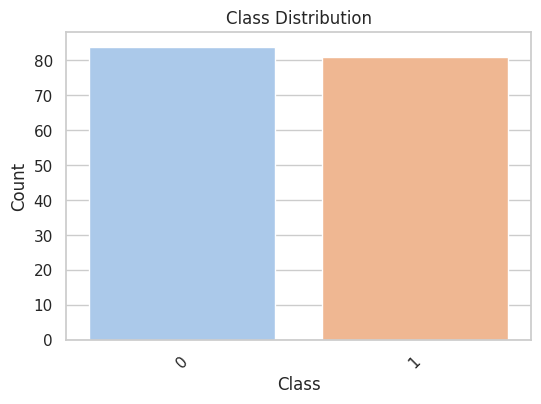

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

plt.figure(figsize=(6, 4))
class_counts = df["class"].value_counts()


sns.barplot(x=class_counts.index, y=class_counts.values, palette="pastel")
plt.xlabel("Class")
plt.ylabel("Count")
plt.title("Class Distribution")
plt.xticks(rotation=45)
plt.show()


In [17]:
from sklearn.model_selection import train_test_split
X = df.drop(columns=["class"])
y = df["class"]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

In [18]:
print(" Distribution des classes dans Train :")
print(y_train.value_counts(normalize=True))
print("\n Distribution des classes dans Test :")
print(y_test.value_counts(normalize=True))

 Distribution des classes dans Train :
class
0    0.507576
1    0.492424
Name: proportion, dtype: float64

 Distribution des classes dans Test :
class
0    0.515152
1    0.484848
Name: proportion, dtype: float64


In [19]:
print(f" Nombre total d'échantillons dans Train : {len(y_train)}")
print(f" Nombre total d'échantillons dans Test : {len(y_test)}")


 Nombre total d'échantillons dans Train : 132
 Nombre total d'échantillons dans Test : 33


In [20]:
train_path = "train_data.csv"
test_path = "test_data.csv"
train_data = pd.concat([X_train, y_train], axis=1)
test_data = pd.concat([X_test, y_test], axis=1)
train_data.to_csv(train_path, index=False)
test_data.to_csv(test_path, index=False)
print(f" Fichiers enregistrés : {train_path}, {test_path}")


 Fichiers enregistrés : train_data.csv, test_data.csv


In [21]:
train_df = pd.read_csv("/kaggle/working/train_data.csv")
test_df = pd.read_csv("/kaggle/working/test_data.csv")


In [22]:
X_train = train_df.drop(columns=["class"])
y_train = train_df["class"]
X_test = test_df.drop(columns=["class"])
y_test = test_df["class"]

In [23]:
param_grid = {
    "KNN": {
        "model": KNeighborsClassifier(),
        "params": {"n_neighbors": [3, 5, 7, 9],
                   "weights": ["uniform", "distance"],
                   "metric": ["euclidean", "manhattan", "minkowski"]}
    },
    "SVM": {
        "model": SVC(),
        "params": {"C": [0.1, 1, 10, 100], "kernel": ["linear", "rbf", "poly", "sigmoid"]}
    },
    "Random Forest": {
        "model": RandomForestClassifier(random_state=42),
        "params": {"n_estimators": [50, 100, 200], "max_depth": [None, 10, 20]}
    },
    "Gradient Boosting": {
        "model": GradientBoostingClassifier(random_state=42),
        "params": {"n_estimators": [50, 100, 200], "learning_rate": [0.01, 0.1, 0.2], "max_depth": [3, 5, 7]}
    },
    "Logistic Regression": {
        "model": LogisticRegression(max_iter=1000),
        "params": {"C": [0.1, 1, 10]}
    }
}

if 'X_train' not in locals() or 'y_train' not in locals():
    raise ValueError("X_train and y_train are not defined. Make sure they are loaded.")

best_models = {}
best_scores = {}

for name, config in param_grid.items():
    grid_search = GridSearchCV(config["model"], config["params"], cv=5, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_train, y_train)

    best_models[name] = grid_search.best_estimator_
    best_scores[name] = grid_search.best_score_

    print("=" * 60)
    print(f"{name} - Best score: {grid_search.best_score_:.4f}")
    print(f"Best parameters: {grid_search.best_params_}")
    print("=" * 60)

print("\nÉvaluation des modèles sélectionnés :")
for name, model in best_models.items():
    scores = cross_val_score(model, X_train, y_train, cv=5)
    print(f"{name} - Accuracy moyenne: {scores.mean():.4f}, Écart-type: {scores.std():.4f}")


KNN - Best score: 0.7949
Best parameters: {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'uniform'}
SVM - Best score: 0.8256
Best parameters: {'C': 100, 'kernel': 'rbf'}
Random Forest - Best score: 0.9467
Best parameters: {'max_depth': None, 'n_estimators': 100}
Gradient Boosting - Best score: 0.9849
Best parameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 50}
Logistic Regression - Best score: 0.8028
Best parameters: {'C': 10}

Évaluation des modèles sélectionnés :
KNN - Accuracy moyenne: 0.7949, Écart-type: 0.0632
SVM - Accuracy moyenne: 0.8256, Écart-type: 0.0653
Random Forest - Accuracy moyenne: 0.9467, Écart-type: 0.0395
Gradient Boosting - Accuracy moyenne: 0.9849, Écart-type: 0.0185
Logistic Regression - Accuracy moyenne: 0.8028, Écart-type: 0.0606


In [24]:
from sklearn.metrics import classification_report

print("\nFinal Evaluation on Test Set:")
for name, model in best_models.items():
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name} - Test Accuracy: {accuracy:.4f}")
    print(classification_report(y_test, y_pred))
    print("=" * 60)



Final Evaluation on Test Set:
KNN - Test Accuracy: 0.6364
              precision    recall  f1-score   support

           0       0.60      0.88      0.71        17
           1       0.75      0.38      0.50        16

    accuracy                           0.64        33
   macro avg       0.68      0.63      0.61        33
weighted avg       0.67      0.64      0.61        33

SVM - Test Accuracy: 0.6970
              precision    recall  f1-score   support

           0       0.68      0.76      0.72        17
           1       0.71      0.62      0.67        16

    accuracy                           0.70        33
   macro avg       0.70      0.69      0.69        33
weighted avg       0.70      0.70      0.70        33

Random Forest - Test Accuracy: 0.8485
              precision    recall  f1-score   support

           0       0.88      0.82      0.85        17
           1       0.82      0.88      0.85        16

    accuracy                           0.85        33
   

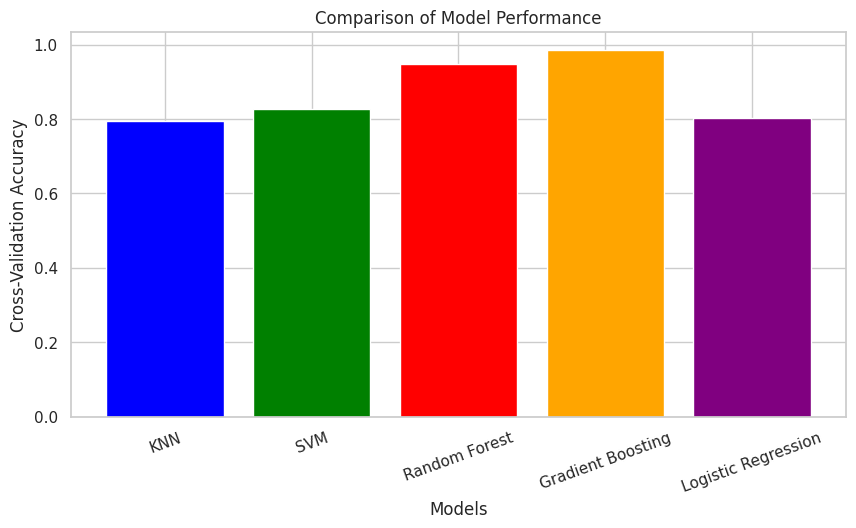

In [25]:
import matplotlib.pyplot as plt
models = list(best_scores.keys())
scores = list(best_scores.values())
plt.figure(figsize=(10, 5))
plt.bar(models, scores, color=['blue', 'green', 'red', 'orange', 'purple'])
plt.xlabel("Models")
plt.ylabel("Cross-Validation Accuracy")
plt.title("Comparison of Model Performance")
plt.xticks(rotation=20)
plt.show()


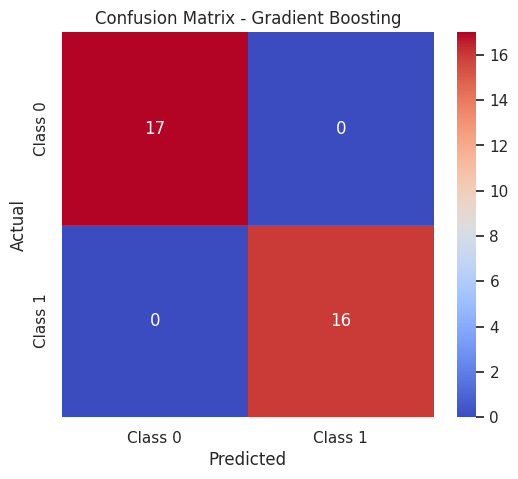

In [26]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

best_model_name = max(best_scores, key=best_scores.get)
best_model = best_models[best_model_name]

y_pred = best_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="coolwarm", xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title(f"Confusion Matrix - {best_model_name}")
plt.show()


In [27]:
from sklearn.metrics import accuracy_score
for name, model in best_models.items():
    y_pred = model.predict(X_test)
    test_score = accuracy_score(y_test, y_pred)
    print(f" {name} - Score sur test: {test_score:.4f}")


 KNN - Score sur test: 0.6364
 SVM - Score sur test: 0.6970
 Random Forest - Score sur test: 0.8485
 Gradient Boosting - Score sur test: 1.0000
 Logistic Regression - Score sur test: 0.7576


In [28]:
import os
import joblib
save_dir = '/kaggle/working/'
models_path = os.path.join(save_dir, 'zhaimer_model.pkl')
joblib.dump(best_models, models_path)
print(f"Modèles sauvegardés : {models_path}")

Modèles sauvegardés : /kaggle/working/zhaimer_model.pkl


In [29]:
import joblib
joblib.dump(best_models["Gradient Boosting"], "Gradient Boosting_model.pkl")
print("Modèle Gradient Boosting enregistré sous 'Gradient Boosting_model.pkl'.")


Modèle Gradient Boosting enregistré sous 'Gradient Boosting_model.pkl'.


In [6]:
import pandas as pd
from io import StringIO
train_path = "/kaggle/working/train_data.csv"
test_path = "/kaggle/working/test_data.csv"
train_df = pd.read_csv(train_path)
test_df = pd.read_csv(test_path)
df = train_df.copy()

In [7]:
import tensorflow as tf
# Supposons que df est votre DataFrame déjà chargé
features = df.drop(columns=['class'])
conditions = df['class'].values
scaler = MinMaxScaler()
features_scaled = scaler.fit_transform(features)
real_data = tf.convert_to_tensor(features_scaled, dtype=tf.float32)
conditions = tf.one_hot(conditions, depth=2)

In [8]:
noise_dim = 200
data_dim = features_scaled.shape[1]
condition_dim = 2


In [33]:
def build_generator():
    noise_input = tf.keras.layers.Input(shape=(noise_dim,))
    condition_input = tf.keras.layers.Input(shape=(condition_dim,))
    x = tf.keras.layers.Concatenate()([noise_input, condition_input])
    x = tf.keras.layers.Dense(128)(x)
    x = tf.keras.layers.LeakyReLU(alpha=0.2)(x)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.Dense(256)(x)
    x = tf.keras.layers.LeakyReLU(alpha=0.2)(x)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.Dropout(0.3)(x)
    x = tf.keras.layers.Dense(512)(x)
    x = tf.keras.layers.LeakyReLU(alpha=0.2)(x)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.Dense(256)(x)
    x = tf.keras.layers.LeakyReLU(alpha=0.2)(x)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.Dense(data_dim, activation='sigmoid')(x)
    return tf.keras.Model([noise_input, condition_input], x)

generator = build_generator()

generator.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 200)            │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ input_layer_1             │ (None, 2)              │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate (Concatenate) │ (None, 202)            │              0 │ input_layer[0][0],     │
│                           │                        │                │ input_layer_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense (Dense)             │ (None, 128)            │         25,984 │ concatenate[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ leaky_re_lu (LeakyReLU)   │ (None, 128)            │              0 │ dense[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization       │ (None, 128)            │            512 │ leaky_re_lu[0][0]      │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_1 (Dense)           │ (None, 256)            │         33,024 │ batch_normalization[0… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ leaky_re_lu_1 (LeakyReLU) │ (None, 256)            │              0 │ dense_1[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_1     │ (None, 256)            │          1,024 │ leaky_re_lu_1[0][0]    │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout (Dropout)         │ (None, 256)            │              0 │ batch_normalization_1… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_2 (Dense)           │ (None, 512)            │        131,584 │ dropout[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ leaky_re_lu_2 (LeakyReLU) │ (None, 512)            │              0 │ dense_2[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_2     │ (None, 512)            │          2,048 │ leaky_re_lu_2[0][0]    │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_3 (Dense)           │ (None, 256)            │        131,328 │ batch_normalization_2… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ leaky_re_lu_3 (LeakyReLU) │ (None, 256)            │              0 │ dense_3[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_3     │ (None, 256)            │          1,024 │ leaky_re_lu_3[0][0]    │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_4 (Dense)      

 Total params: 442,435 (1.69 MB)

 Trainable params: 440,131 (1.68 MB)

 Non-trainable params: 2,304 (9.00 KB)

In [34]:
def build_discriminator():
    data_input = tf.keras.layers.Input(shape=(data_dim,))
    condition_input = tf.keras.layers.Input(shape=(condition_dim,))
    x = tf.keras.layers.Concatenate()([data_input, condition_input])
    x = tf.keras.layers.Dense(512)(x)  # Nouvelle couche
    x = tf.keras.layers.LeakyReLU(alpha=0.2)(x)
    x = tf.keras.layers.Dropout(0.4)(x)
    x = tf.keras.layers.Dense(256)(x)
    x = tf.keras.layers.LeakyReLU(alpha=0.2)(x)
    x = tf.keras.layers.Dropout(0.4)(x)
    x = tf.keras.layers.Dense(128)(x)
    x = tf.keras.layers.LeakyReLU(alpha=0.2)(x)
    x = tf.keras.layers.Dropout(0.3)(x)
    x = tf.keras.layers.Dense(64)(x)
    x = tf.keras.layers.LeakyReLU(alpha=0.2)(x)
    x = tf.keras.layers.Dense(1, activation='sigmoid')(x)
    return tf.keras.Model([data_input, condition_input], x)

discriminator = build_discriminator()
discriminator.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2             │ (None, 451)            │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ input_layer_3             │ (None, 2)              │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate_1             │ (None, 453)            │              0 │ input_layer_2[0][0],   │
│ (Concatenate)             │                        │                │ input_layer_3[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_5 (Dense)           │ (None, 512)            │        232,448 │ concatenate_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ leaky_re_lu_4 (LeakyReLU) │ (None, 512)            │              0 │ dense_5[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_1 (Dropout)       │ (None, 512)            │              0 │ leaky_re_lu_4[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_6 (Dense)           │ (None, 256)            │        131,328 │ dropout_1[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ leaky_re_lu_5 (LeakyReLU) │ (None, 256)            │              0 │ dense_6[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_2 (Dropout)       │ (None, 256)            │              0 │ leaky_re_lu_5[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_7 (Dense)           │ (None, 128)            │         32,896 │ dropout_2[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ leaky_re_lu_6 (LeakyReLU) │ (None, 128)            │              0 │ dense_7[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_3 (Dropout)       │ (None, 128)            │              0 │ leaky_re_lu_6[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_8 (Dense)           │ (None, 64)             │          8,256 │ dropout_3[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ leaky_re_lu_7 (LeakyReLU) │ (None, 64)             │              0 │ dense_8[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_9 (Dense)           │ (None, 1)              │             65 │ leaky_re_lu_7[0][0]    │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 404,993 (1.54 MB)

 Trainable params: 404,993 (1.54 MB)

 Non-trainable params: 0 (0.00 B)

In [35]:
# Planificateurs de taux d'apprentissage
g_lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=2e-4,
    decay_steps=1000,
    decay_rate=0.96,
    staircase=True
)

In [36]:
d_lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=2e-5,  # Réduire le taux d'apprentissage
    decay_steps=1000,
    decay_rate=0.96,
    staircase=True
)

In [37]:
# Optimiseurs avec les planificateurs
generator_optimizer = tf.keras.optimizers.Adam(learning_rate=g_lr_schedule)
discriminator_optimizer = tf.keras.optimizers.Adam(learning_rate=d_lr_schedule)

In [38]:
cross_entropy = tf.keras.losses.BinaryCrossentropy()

In [39]:
@tf.function
def train_generator(conditions, batch_size):
    noise = tf.random.normal([batch_size, noise_dim])
    with tf.GradientTape() as tape:
        fake_data = generator([noise, conditions], training=True)
        fake_output = discriminator([fake_data, conditions], training=True)
        g_loss = cross_entropy(tf.ones_like(fake_output), fake_output)
        real_mean = tf.reduce_mean(real_data, axis=0)
        fake_mean = tf.reduce_mean(fake_data, axis=0)
        real_var = tf.math.reduce_variance(real_data, axis=0)
        fake_var = tf.math.reduce_variance(fake_data, axis=0)
        mean_loss = tf.reduce_mean(tf.abs(real_mean - fake_mean))
        var_loss = tf.reduce_mean(tf.abs(real_var - fake_var))
        total_g_loss = g_loss + 0.005 * (mean_loss + var_loss)
    gradients = tape.gradient(total_g_loss, generator.trainable_variables)
    generator_optimizer.apply_gradients(zip(gradients, generator.trainable_variables))
    return total_g_loss

In [40]:
@tf.function
def train_discriminator(real_data, conditions, batch_size):
    noise = tf.random.normal([batch_size, noise_dim])
    fake_data = generator([noise, conditions], training=True)
    # Ajouter du bruit aux entrées
    real_data_noisy = real_data + tf.random.normal(tf.shape(real_data), stddev=0.01)
    fake_data_noisy = fake_data + tf.random.normal(tf.shape(fake_data), stddev=0.01)
    with tf.GradientTape() as tape:
        real_output = discriminator([real_data_noisy, conditions], training=True)
        fake_output = discriminator([fake_data_noisy, conditions], training=True)
        real_loss = cross_entropy(tf.ones_like(real_output) * 0.9, real_output)
        fake_loss = cross_entropy(tf.zeros_like(fake_output) * 0.1, fake_output)
        total_loss = real_loss + fake_loss
    gradients = tape.gradient(total_loss, discriminator.trainable_variables)
    discriminator_optimizer.apply_gradients(zip(gradients, discriminator.trainable_variables))
    return total_loss

In [41]:
# Initialiser des listes pour stocker les pertes
d_losses = []
g_losses = []

epochs = 7000  # Prolonger l'entraînement
batch_size = 256

for epoch in range(epochs):
    idx = np.random.randint(0, real_data.shape[0], batch_size)
    real_batch = tf.gather(real_data, idx)
    condition_batch = tf.gather(conditions, idx)

    # Entraînement du discriminateur (1 fois par époque)
    d_loss = train_discriminator(real_batch, condition_batch, batch_size)

    # Entraînement du générateur (1 fois par époque)
    g_loss = train_generator(condition_batch, batch_size)

    # Stocker les pertes
    d_losses.append(d_loss.numpy())
    g_losses.append(g_loss.numpy())

    # Afficher les pertes toutes les 100 époques
    if epoch % 100 == 0:
        print(f"Epoch {epoch}, D Loss: {d_loss:.4f}, G Loss: {g_loss:.4f}")

Epoch 0, D Loss: 1.4222, G Loss: 0.6244
Epoch 100, D Loss: 0.7011, G Loss: 1.9994
Epoch 200, D Loss: 0.7883, G Loss: 3.3129
Epoch 300, D Loss: 0.9463, G Loss: 2.6284
Epoch 400, D Loss: 1.1519, G Loss: 1.5554
Epoch 500, D Loss: 1.3542, G Loss: 1.1493
Epoch 600, D Loss: 1.4182, G Loss: 0.9292
Epoch 700, D Loss: 1.3472, G Loss: 0.9053
Epoch 800, D Loss: 1.3688, G Loss: 0.8888
Epoch 900, D Loss: 1.3740, G Loss: 0.8550
Epoch 1000, D Loss: 1.3818, G Loss: 0.8133
Epoch 1100, D Loss: 1.3841, G Loss: 0.7925
Epoch 1200, D Loss: 1.3808, G Loss: 0.7862
Epoch 1300, D Loss: 1.3799, G Loss: 0.7870
Epoch 1400, D Loss: 1.3748, G Loss: 0.7904
Epoch 1500, D Loss: 1.3922, G Loss: 0.7804
Epoch 1600, D Loss: 1.3782, G Loss: 0.7820
Epoch 1700, D Loss: 1.3812, G Loss: 0.7653
Epoch 1800, D Loss: 1.3717, G Loss: 0.7639
Epoch 1900, D Loss: 1.3721, G Loss: 0.7627
Epoch 2000, D Loss: 1.3818, G Loss: 0.7582
Epoch 2100, D Loss: 1.3954, G Loss: 0.7589
Epoch 2200, D Loss: 1.3903, G Loss: 0.7559
Epoch 2300, D Loss: 1.3

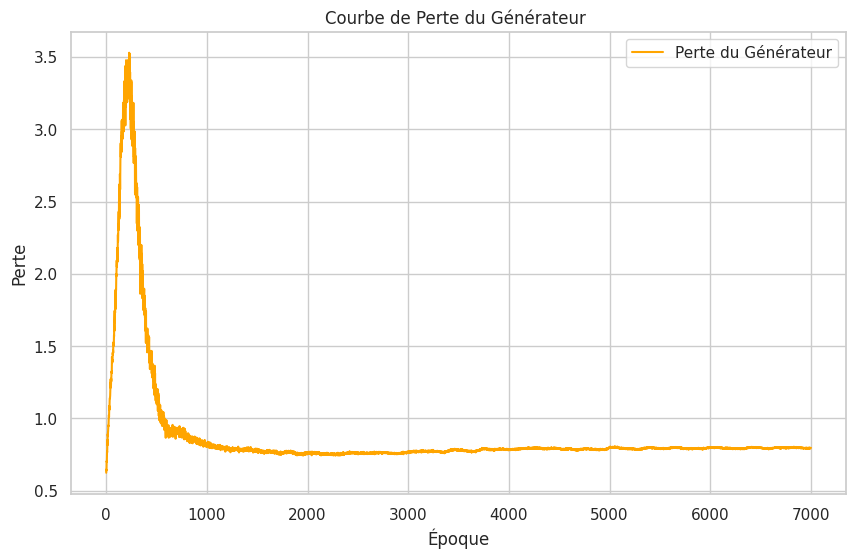

In [42]:
# Tracer les courbes des pertes
plt.figure(figsize=(10, 6))
plt.plot(g_losses, label='Perte du Générateur', color='orange')
plt.xlabel('Époque')
plt.ylabel('Perte')
plt.title('Courbe de Perte du Générateur ')
plt.legend()
plt.grid(True)
plt.savefig('/kaggle/working/loss_curves_updated.png')
plt.show()

In [43]:
generator.save('/kaggle/working/generator_zhaimer1.h5')

In [44]:
def generate_synthetic_data(generator, num_samples, class_label):
    noise = tf.random.normal([num_samples, noise_dim])
    condition = tf.one_hot([class_label] * num_samples, depth=condition_dim)
    synthetic_data = generator([noise, condition], training=False)
    synthetic_data = tf.clip_by_value(synthetic_data, 0.2, 0.8)  # Clipping strict
    synthetic_data = scaler.inverse_transform(synthetic_data.numpy())
    synthetic_df = pd.DataFrame(synthetic_data, columns=features.columns)
    synthetic_df['class'] = class_label
    return synthetic_df

In [66]:
synthetic_class_0 = generate_synthetic_data(generator, 500000, 0)
synthetic_class_1 = generate_synthetic_data(generator, 500000, 1)
synthetic_combined = pd.concat([synthetic_class_0, synthetic_class_1], ignore_index=True)
synthetic_combined.to_csv('/kaggle/working/synthetic_data_Al_zhaimer.csv', index=False)

In [65]:

import joblib
import pandas as pd
import os
from sklearn.metrics import accuracy_score, classification_report

# Définition du chemin du modèle
model_path = "/kaggle/working/Gradient Boosting_model.pkl"

# Vérifier que le fichier existe
if os.path.exists(model_path):
    # Charger le modèle
    model = joblib.load(model_path)
    print("Modèle chargé avec succès.\n")
    
    # Données réelles
    # Vérifier que la colonne 'class' existe dans test_df
    if 'class' in test_df.columns:
        X_test = test_df.drop(columns=['class'])
        y_test = test_df['class']
    else:
        print("Erreur : La colonne 'class' n'existe pas dans test_df")
        print("Colonnes disponibles :", test_df.columns)
        raise KeyError("Colonne 'class' non trouvée")

    # Prédictions sur les données de test réelles
    predictions_test = model.predict(X_test)
    accuracy_test = accuracy_score(y_test, predictions_test)
    print(f"Exactitude sur les données de test réelles : {accuracy_test:.4f}")
    print("\nRapport de classification (test réel) :")
    print(classification_report(y_test, predictions_test, target_names=['Classe 1', 'Classe 2']))

    # Données synthétiques
    # Vérifier que la colonne 'class' existe dans synthetic_combined
    if 'class' in synthetic_combined.columns:
        X_synthetic = synthetic_combined.drop(columns=['class'])
        y_synthetic = synthetic_combined['class']
    else:
        print("Erreur : La colonne 'class' n'existe pas dans synthetic_combined")
        print("Colonnes disponibles :", synthetic_combined.columns)
        raise KeyError("Colonne 'class' non trouvée")

    # Réordonner les colonnes pour qu'elles correspondent à celles utilisées lors de l'entraînement
    try:
        X_synthetic = X_synthetic[model.feature_names_in_]
    except AttributeError:
        print("Erreur : Le modèle n'a pas d'attribut 'feature_names_in_'")
        print("Vérifiez que le modèle a été entraîné avec un DataFrame pandas.")
        raise
    except KeyError as e:
        print("Erreur : Les colonnes de X_synthetic ne correspondent pas à celles du modèle")
        print("Colonnes attendues par le modèle :", model.feature_names_in_)
        print("Colonnes dans X_synthetic :", X_synthetic.columns)
        raise

    # Prédictions sur les données synthétiques
    predictions_synthetic = model.predict(X_synthetic)
    accuracy_synthetic = accuracy_score(y_synthetic, predictions_synthetic)
    print(f"\nExactitude sur les données synthétiques : {accuracy_synthetic:.4f}")
    print("\nRapport de classification (synthétiques) :")
    print(classification_report(y_synthetic, predictions_synthetic, target_names=['Classe 1', 'Classe 2']))

else:
    print(f"Erreur : le fichier du modèle n'a pas été trouvé au chemin {model_path}")

Modèle chargé avec succès.

Exactitude sur les données de test réelles : 1.0000

Rapport de classification (test réel) :
              precision    recall  f1-score   support

    Classe 1       1.00      1.00      1.00        17
    Classe 2       1.00      1.00      1.00        16

    accuracy                           1.00        33
   macro avg       1.00      1.00      1.00        33
weighted avg       1.00      1.00      1.00        33


Exactitude sur les données synthétiques : 0.9255

Rapport de classification (synthétiques) :
              precision    recall  f1-score   support

    Classe 1       0.89      0.97      0.93    100000
    Classe 2       0.96      0.88      0.92    100000

    accuracy                           0.93    200000
   macro avg       0.93      0.93      0.93    200000
weighted avg       0.93      0.93      0.93    200000



In [27]:
import tensorflow as tf
import pandas as pd
import joblib
import os
from sklearn.metrics import accuracy_score, classification_report

# Fonction pour générer des données synthétiques
def generate_synthetic_data(generator, num_samples, class_label):
    noise = tf.random.normal([num_samples, noise_dim])
    condition = tf.one_hot([class_label] * num_samples, depth=condition_dim)
    synthetic_data = generator([noise, condition], training=False)
    synthetic_data = tf.clip_by_value(synthetic_data, 0.2, 0.8)  # Clipping strict
    synthetic_data = scaler.inverse_transform(synthetic_data.numpy())
    # Créer un DataFrame avec toutes les colonnes de 'features' (y compris 'ID')
    synthetic_df = pd.DataFrame(synthetic_data, columns=features.columns)
    synthetic_df['class'] = class_label
    # Ajouter un index numérique
    synthetic_df.index = range(num_samples)
    return synthetic_df

# Charger le générateur
generator = tf.keras.models.load_model('/kaggle/working/generator_zhaimer1.h5')

# Générer 1000 lignes par classe
num_samples_per_class = 1000
classes = [0, 1]  # Supposons que vous avez deux classes (ajustez selon votre cas)

synthetic_dfs = []
for class_label in classes:
    synthetic_df = generate_synthetic_data(generator, num_samples_per_class, class_label)
    synthetic_dfs.append(synthetic_df)

# Combiner les données synthétiques
synthetic_combined = pd.concat(synthetic_dfs, ignore_index=True)

# Afficher les données synthétiques sans la colonne 'ID'
display_columns = [col for col in synthetic_combined.columns if col.lower() != 'id']
print("Données synthétiques générées (sans la colonne 'ID' dans l'affichage) :")
print(synthetic_combined[display_columns].head())  # Affiche les premières lignes sans 'ID'

# Sauvegarder les données synthétiques sans la colonne 'ID' (facultatif)
synthetic_combined[display_columns].to_csv('/kaggle/working/synthetic_data1000.csv', index=True, index_label='index')

Données synthétiques générées (sans la colonne 'ID' dans l'affichage) :
      air_time1  disp_index1  gmrt_in_air1  gmrt_on_paper1  max_x_extension1  \
0  19613.201172     0.000013    256.653259      196.990784       4323.600098   
1  19613.201172     0.000009    256.653259      196.990784       4323.600098   
2  19613.201172     0.000019    256.653259      698.155579       4323.600098   
3  19613.201172     0.000010    256.653259      196.990784       4323.600098   
4  19613.201172     0.000008    256.653259      196.990784       4323.600098   

   max_y_extension1  mean_acc_in_air1  mean_acc_on_paper1  mean_gmrt1  \
0       3605.399902          0.856971            0.202775  200.316483   
1       7387.820312          0.608712            0.202775  260.875305   
2      12738.600586          1.900621            0.202775  200.316483   
3       7089.840332          0.608712            0.202775  251.922531   
4       7583.785156          0.608712            0.202775  237.480820   

   mean_

In [28]:
# Charger et tester le modèle Gradient Boosting
model_path = "/kaggle/working/Gradient Boosting_model.pkl"

if os.path.exists(model_path):
    # Charger le modèle
    model = joblib.load(model_path)
    print("\nModèle chargé avec succès.\n")

    # Données réelles
    if 'class' in test_df.columns:
        X_test = test_df.drop(columns=['class'])  # Ne pas supprimer 'ID' ici
        y_test = test_df['class']
    else:
        print("Erreur : La colonne 'class' n'existe pas dans test_df")
        print("Colonnes disponibles :", test_df.columns)
        raise KeyError("Colonne 'class' non trouvée")

    # Vérifier que les colonnes de X_test correspondent à celles attendues par le modèle
    try:
        X_test = X_test[model.feature_names_in_]
    except KeyError as e:
        print("Erreur : Les colonnes de X_test ne correspondent pas à celles du modèle")
        print("Colonnes attendues par le modèle :", model.feature_names_in_)
        print("Colonnes dans X_test :", X_test.columns)
        raise

    # Prédictions sur les données de test réelles
    predictions_test = model.predict(X_test)
    accuracy_test = accuracy_score(y_test, predictions_test)
    print(f"Exactitude sur les données de test réelles : {accuracy_test:.4f}")
    print("\nRapport de classification (test réel) :")
    print(classification_report(y_test, predictions_test, target_names=['Classe 1', 'Classe 2']))

    # Données synthétiques
    if 'class' in synthetic_combined.columns:
        X_synthetic = synthetic_combined.drop(columns=['class'])  # Ne pas supprimer 'ID' ici
        y_synthetic = synthetic_combined['class']
    else:
        print("Erreur : La colonne 'class' n'existe pas dans synthetic_combined")
        print("Colonnes disponibles :", synthetic_combined.columns)
        raise KeyError("Colonne 'class' non trouvée")

    # Réordonner les colonnes pour correspondre à celles utilisées lors de l'entraînement
    try:
        X_synthetic = X_synthetic[model.feature_names_in_]
    except KeyError as e:
        print("Erreur : Les colonnes de X_synthetic ne correspondent pas à celles du modèle")
        print("Colonnes attendues par le modèle :", model.feature_names_in_)
        print("Colonnes dans X_synthetic :", X_synthetic.columns)
        raise

    # Prédictions sur les données synthétiques
    predictions_synthetic = model.predict(X_synthetic)
    accuracy_synthetic = accuracy_score(y_synthetic, predictions_synthetic)
    print(f"\nExactitude sur les données synthétiques : {accuracy_synthetic:.4f}")
    print("\nRapport de classification (synthétiques) :")
    print(classification_report(y_synthetic, predictions_synthetic, target_names=['Classe 1', 'Classe 2']))

else:
    print(f"Erreur : le fichier du modèle n'a pas été trouvé au chemin {model_path}")


Modèle chargé avec succès.

Exactitude sur les données de test réelles : 1.0000

Rapport de classification (test réel) :
              precision    recall  f1-score   support

    Classe 1       1.00      1.00      1.00        17
    Classe 2       1.00      1.00      1.00        16

    accuracy                           1.00        33
   macro avg       1.00      1.00      1.00        33
weighted avg       1.00      1.00      1.00        33


Exactitude sur les données synthétiques : 0.9270

Rapport de classification (synthétiques) :
              precision    recall  f1-score   support

    Classe 1       0.91      0.95      0.93      1000
    Classe 2       0.94      0.91      0.93      1000

    accuracy                           0.93      2000
   macro avg       0.93      0.93      0.93      2000
weighted avg       0.93      0.93      0.93      2000



In [23]:
import tensorflow as tf
import pandas as pd
import joblib
import os
from sklearn.metrics import accuracy_score, classification_report

# Fonction pour générer des données synthétiques
def generate_synthetic_data(generator, num_samples, class_label):
    noise = tf.random.normal([num_samples, noise_dim])
    condition = tf.one_hot([class_label] * num_samples, depth=condition_dim)
    synthetic_data = generator([noise, condition], training=False)
    synthetic_data = tf.clip_by_value(synthetic_data, 0.2, 0.8)  # Clipping strict
    synthetic_data = scaler.inverse_transform(synthetic_data.numpy())
    # Créer un DataFrame avec toutes les colonnes de 'features' (y compris 'ID')
    synthetic_df = pd.DataFrame(synthetic_data, columns=features.columns)
    synthetic_df['class'] = class_label
    # Ajouter un index numérique
    synthetic_df.index = range(num_samples)
    return synthetic_df

# Charger le générateur
generator = tf.keras.models.load_model('/kaggle/working/generator_zhaimer1.h5')

# Générer 1000 lignes par classe
num_samples_per_class = 10000
classes = [0, 1]  # Supposons que vous avez deux classes (ajustez selon votre cas)

synthetic_dfs = []
for class_label in classes:
    synthetic_df = generate_synthetic_data(generator, num_samples_per_class, class_label)
    synthetic_dfs.append(synthetic_df)

# Combiner les données synthétiques
synthetic_combined_1= pd.concat(synthetic_dfs, ignore_index=True)

# Afficher les données synthétiques sans la colonne 'ID'
display_columns = [col for col in synthetic_combined_1.columns if col.lower() != 'id']
print("Données synthétiques générées (sans la colonne 'ID' dans l'affichage) :")
print(synthetic_combined_1[display_columns].head())  # Affiche les premières lignes sans 'ID'

# Sauvegarder les données synthétiques sans la colonne 'ID' (facultatif)
synthetic_combined_1[display_columns].to_csv('/kaggle/working/synthetic_data_10000.csv', index=True, index_label='index')

Données synthétiques générées (sans la colonne 'ID' dans l'affichage) :
      air_time1  disp_index1  gmrt_in_air1  gmrt_on_paper1  max_x_extension1  \
0  19613.201172     0.000009    256.653259      196.990784       4323.600098   
1  19613.201172     0.000014    256.653259      196.990784       4323.600098   
2  19613.201172     0.000009    256.653259      196.990784       4323.600098   
3  19613.201172     0.000008    256.653259      196.990784       4323.600098   
4  19613.201172     0.000010    256.653259      196.990784       4323.600098   

   max_y_extension1  mean_acc_in_air1  mean_acc_on_paper1  mean_gmrt1  \
0       7246.796875          0.608712            0.202775  236.896790   
1       3605.399902          0.831234            0.202775  200.316483   
2       7594.324219          0.608712            0.202775  266.420380   
3       7282.005859          0.608712            0.202775  237.017258   
4       7410.236328          0.608712            0.202775  239.277527   

   mean_

In [24]:
# Charger et tester le modèle Gradient Boosting
model_path = "/kaggle/working/Gradient Boosting_model.pkl"

if os.path.exists(model_path):
    # Charger le modèle
    model = joblib.load(model_path)
    print("\nModèle chargé avec succès.\n")

    # Données réelles
    if 'class' in test_df.columns:
        X_test = test_df.drop(columns=['class'])  # Ne pas supprimer 'ID' ici
        y_test = test_df['class']
    else:
        print("Erreur : La colonne 'class' n'existe pas dans test_df")
        print("Colonnes disponibles :", test_df.columns)
        raise KeyError("Colonne 'class' non trouvée")

    # Vérifier que les colonnes de X_test correspondent à celles attendues par le modèle
    try:
        X_test = X_test[model.feature_names_in_]
    except KeyError as e:
        print("Erreur : Les colonnes de X_test ne correspondent pas à celles du modèle")
        print("Colonnes attendues par le modèle :", model.feature_names_in_)
        print("Colonnes dans X_test :", X_test.columns)
        raise

    # Prédictions sur les données de test réelles
    predictions_test = model.predict(X_test)
    accuracy_test = accuracy_score(y_test, predictions_test)
    print(f"Exactitude sur les données de test réelles : {accuracy_test:.4f}")
    print("\nRapport de classification (test réel) :")
    print(classification_report(y_test, predictions_test, target_names=['Classe 1', 'Classe 2']))

    # Données synthétiques
    if 'class' in synthetic_combined_1.columns:
        X_synthetic = synthetic_combined_1.drop(columns=['class'])  # Ne pas supprimer 'ID' ici
        y_synthetic = synthetic_combined_1['class']
    else:
        print("Erreur : La colonne 'class' n'existe pas dans synthetic_combined")
        print("Colonnes disponibles :", synthetic_combined_1.columns)
        raise KeyError("Colonne 'class' non trouvée")

    # Réordonner les colonnes pour correspondre à celles utilisées lors de l'entraînement
    try:
        X_synthetic = X_synthetic[model.feature_names_in_]
    except KeyError as e:
        print("Erreur : Les colonnes de X_synthetic ne correspondent pas à celles du modèle")
        print("Colonnes attendues par le modèle :", model.feature_names_in_)
        print("Colonnes dans X_synthetic :", X_synthetic.columns)
        raise

    # Prédictions sur les données synthétiques
    predictions_synthetic = model.predict(X_synthetic)
    accuracy_synthetic = accuracy_score(y_synthetic, predictions_synthetic)
    print(f"\nExactitude sur les données synthétiques : {accuracy_synthetic:.4f}")
    print("\nRapport de classification (synthétiques) :")
    print(classification_report(y_synthetic, predictions_synthetic, target_names=['Classe 1', 'Classe 2']))

else:
    print(f"Erreur : le fichier du modèle n'a pas été trouvé au chemin {model_path}")


Modèle chargé avec succès.

Exactitude sur les données de test réelles : 1.0000

Rapport de classification (test réel) :
              precision    recall  f1-score   support

    Classe 1       1.00      1.00      1.00        17
    Classe 2       1.00      1.00      1.00        16

    accuracy                           1.00        33
   macro avg       1.00      1.00      1.00        33
weighted avg       1.00      1.00      1.00        33


Exactitude sur les données synthétiques : 0.9270

Rapport de classification (synthétiques) :
              precision    recall  f1-score   support

    Classe 1       0.90      0.96      0.93     10000
    Classe 2       0.96      0.89      0.92     10000

    accuracy                           0.93     20000
   macro avg       0.93      0.93      0.93     20000
weighted avg       0.93      0.93      0.93     20000



In [25]:
import tensorflow as tf
import pandas as pd
import joblib
import os
from sklearn.metrics import accuracy_score, classification_report

# Fonction pour générer des données synthétiques
def generate_synthetic_data(generator, num_samples, class_label):
    noise = tf.random.normal([num_samples, noise_dim])
    condition = tf.one_hot([class_label] * num_samples, depth=condition_dim)
    synthetic_data = generator([noise, condition], training=False)
    synthetic_data = tf.clip_by_value(synthetic_data, 0.2, 0.8)  # Clipping strict
    synthetic_data = scaler.inverse_transform(synthetic_data.numpy())
    # Créer un DataFrame avec toutes les colonnes de 'features' (y compris 'ID')
    synthetic_df = pd.DataFrame(synthetic_data, columns=features.columns)
    synthetic_df['class'] = class_label
    # Ajouter un index numérique
    synthetic_df.index = range(num_samples)
    return synthetic_df

# Charger le générateur
generator = tf.keras.models.load_model('/kaggle/working/generator_zhaimer1.h5')

# Générer 1000 lignes par classe
num_samples_per_class = 100000
classes = [0, 1]  # Supposons que vous avez deux classes (ajustez selon votre cas)

synthetic_dfs = []
for class_label in classes:
    synthetic_df = generate_synthetic_data(generator, num_samples_per_class, class_label)
    synthetic_dfs.append(synthetic_df)

# Combiner les données synthétiques
synthetic_combined_10= pd.concat(synthetic_dfs, ignore_index=True)

# Afficher les données synthétiques sans la colonne 'ID'
display_columns = [col for col in synthetic_combined_10.columns if col.lower() != 'id']
print("Données synthétiques générées (sans la colonne 'ID' dans l'affichage) :")
print(synthetic_combined_10[display_columns].head())  # Affiche les premières lignes sans 'ID'

# Sauvegarder les données synthétiques sans la colonne 'ID' (facultatif)
synthetic_combined_10[display_columns].to_csv('/kaggle/working/synthetic_data_100000.csv', index=True, index_label='index')

Données synthétiques générées (sans la colonne 'ID' dans l'affichage) :
      air_time1  disp_index1  gmrt_in_air1  gmrt_on_paper1  max_x_extension1  \
0  19613.201172     0.000009    256.653259      196.990784       4323.600098   
1  19613.201172     0.000009    256.653259      196.990784       4323.600098   
2  19613.201172     0.000012    256.653259      196.990784       4323.600098   
3  19613.201172     0.000009    256.653259      196.990784       4323.600098   
4  19613.201172     0.000010    256.653259      242.982697       4323.600098   

   max_y_extension1  mean_acc_in_air1  mean_acc_on_paper1  mean_gmrt1  \
0       7247.459961          0.648505            0.202775  269.327759   
1       7586.875000          0.608712            0.202775  264.437744   
2       3647.502930          0.670343            0.203077  200.316483   
3       7990.981445          0.608712            0.202775  272.157867   
4       7409.632812          0.608712            0.202775  235.129761   

   mean_

In [26]:
# Charger et tester le modèle Gradient Boosting
model_path = "/kaggle/working/Gradient Boosting_model.pkl"

if os.path.exists(model_path):
    # Charger le modèle
    model = joblib.load(model_path)
    print("\nModèle chargé avec succès.\n")

    # Données réelles
    if 'class' in test_df.columns:
        X_test = test_df.drop(columns=['class'])  # Ne pas supprimer 'ID' ici
        y_test = test_df['class']
    else:
        print("Erreur : La colonne 'class' n'existe pas dans test_df")
        print("Colonnes disponibles :", test_df.columns)
        raise KeyError("Colonne 'class' non trouvée")

    # Vérifier que les colonnes de X_test correspondent à celles attendues par le modèle
    try:
        X_test = X_test[model.feature_names_in_]
    except KeyError as e:
        print("Erreur : Les colonnes de X_test ne correspondent pas à celles du modèle")
        print("Colonnes attendues par le modèle :", model.feature_names_in_)
        print("Colonnes dans X_test :", X_test.columns)
        raise

    # Prédictions sur les données de test réelles
    predictions_test = model.predict(X_test)
    accuracy_test = accuracy_score(y_test, predictions_test)
    print(f"Exactitude sur les données de test réelles : {accuracy_test:.4f}")
    print("\nRapport de classification (test réel) :")
    print(classification_report(y_test, predictions_test, target_names=['Classe 1', 'Classe 2']))

    # Données synthétiques
    if 'class' in synthetic_combined_10.columns:
        X_synthetic = synthetic_combined_10.drop(columns=['class'])  # Ne pas supprimer 'ID' ici
        y_synthetic = synthetic_combined_10['class']
    else:
        print("Erreur : La colonne 'class' n'existe pas dans synthetic_combined")
        print("Colonnes disponibles :", synthetic_combined_1.columns)
        raise KeyError("Colonne 'class' non trouvée")

    # Réordonner les colonnes pour correspondre à celles utilisées lors de l'entraînement
    try:
        X_synthetic = X_synthetic[model.feature_names_in_]
    except KeyError as e:
        print("Erreur : Les colonnes de X_synthetic ne correspondent pas à celles du modèle")
        print("Colonnes attendues par le modèle :", model.feature_names_in_)
        print("Colonnes dans X_synthetic :", X_synthetic.columns)
        raise

    # Prédictions sur les données synthétiques
    predictions_synthetic = model.predict(X_synthetic)
    accuracy_synthetic = accuracy_score(y_synthetic, predictions_synthetic)
    print(f"\nExactitude sur les données synthétiques : {accuracy_synthetic:.4f}")
    print("\nRapport de classification (synthétiques) :")
    print(classification_report(y_synthetic, predictions_synthetic, target_names=['Classe 1', 'Classe 2']))

else:
    print(f"Erreur : le fichier du modèle n'a pas été trouvé au chemin {model_path}")


Modèle chargé avec succès.

Exactitude sur les données de test réelles : 1.0000

Rapport de classification (test réel) :
              precision    recall  f1-score   support

    Classe 1       1.00      1.00      1.00        17
    Classe 2       1.00      1.00      1.00        16

    accuracy                           1.00        33
   macro avg       1.00      1.00      1.00        33
weighted avg       1.00      1.00      1.00        33


Exactitude sur les données synthétiques : 0.9251

Rapport de classification (synthétiques) :
              precision    recall  f1-score   support

    Classe 1       0.89      0.96      0.93    100000
    Classe 2       0.96      0.89      0.92    100000

    accuracy                           0.93    200000
   macro avg       0.93      0.93      0.92    200000
weighted avg       0.93      0.93      0.92    200000



In [48]:
import pandas as pd
import tensorflow as tf
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, classification_report
import joblib

# Load dataset
train_path = "/kaggle/working/train_data.csv"
test_path = "/kaggle/working/test_data.csv"
train_df = pd.read_csv(train_path)
test_df = pd.read_csv(test_path)

# Use train data
df = train_df.copy()
features = df.drop(columns=['class'])
conditions = df['class'].values

In [49]:
# Use train data
df = train_df.copy()
features = df.drop(columns=['class'])
conditions = df['class'].values

# Normalize features
scaler = MinMaxScaler()
features_scaled = scaler.fit_transform(features)
real_data = tf.convert_to_tensor(features_scaled, dtype=tf.float32)
conditions = tf.one_hot(conditions, depth=2)

In [50]:
data_dim = features_scaled.shape[1]
condition_dim = 2
latent_dim = 100

In [51]:
def build_encoder():
    data_input = tf.keras.layers.Input(shape=(data_dim,))
    condition_input = tf.keras.layers.Input(shape=(condition_dim,))
    x = tf.keras.layers.Concatenate()([data_input, condition_input])
    x = tf.keras.layers.Dense(512, activation='relu')(x)
    x = tf.keras.layers.Dense(256, activation='relu')(x)
    mean = tf.keras.layers.Dense(latent_dim)(x)
    log_var = tf.keras.layers.Dense(latent_dim)(x)
    model = tf.keras.Model([data_input, condition_input], [mean, log_var])
    return model
encoder = build_encoder()
encoder.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_4             │ (None, 451)            │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ input_layer_5             │ (None, 2)              │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate_2             │ (None, 453)            │              0 │ input_layer_4[0][0],   │
│ (Concatenate)             │                        │                │ input_layer_5[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_10 (Dense)          │ (None, 512)            │        232,448 │ concatenate_2[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_11 (Dense)          │ (None, 256)            │        131,328 │ dense_10[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_12 (Dense)          │ (None, 100)            │         25,700 │ dense_11[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_13 (Dense)          │ (None, 100)            │         25,700 │ dense_11[0][0]         │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 415,176 (1.58 MB)

 Trainable params: 415,176 (1.58 MB)

 Non-trainable params: 0 (0.00 B)

In [52]:
def sampling(args):
    mean, log_var = args
    epsilon = tf.keras.backend.random_normal(shape=(tf.shape(mean)[0], latent_dim))
    return mean + tf.exp(0.5 * log_var) * epsilon

In [53]:
def build_decoder():
    latent_input = tf.keras.layers.Input(shape=(latent_dim,))
    condition_input = tf.keras.layers.Input(shape=(condition_dim,))
    x = tf.keras.layers.Concatenate()([latent_input, condition_input])
    x = tf.keras.layers.Dense(256, activation='relu')(x)
    x = tf.keras.layers.Dense(512, activation='relu')(x)
    x = tf.keras.layers.Dense(data_dim, activation='sigmoid')(x)
    model = tf.keras.Model([latent_input, condition_input], x)
    return model
decoder = build_decoder()
decoder.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_6             │ (None, 100)            │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ input_layer_7             │ (None, 2)              │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate_3             │ (None, 102)            │              0 │ input_layer_6[0][0],   │
│ (Concatenate)             │                        │                │ input_layer_7[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_14 (Dense)          │ (None, 256)            │         26,368 │ concatenate_3[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_15 (Dense)          │ (None, 512)            │        131,584 │ dense_14[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_16 (Dense)          │ (None, 451)            │        231,363 │ dense_15[0][0]         │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 389,315 (1.49 MB)

 Trainable params: 389,315 (1.49 MB)

 Non-trainable params: 0 (0.00 B)

In [54]:
# Define VAE loss
cross_entropy = tf.keras.losses.BinaryCrossentropy()
optimizer = tf.keras.optimizers.Adam(1e-4)

In [55]:
@tf.function
def train_step(real_data, conditions):
    with tf.GradientTape() as tape:
        mean, log_var = encoder([real_data, conditions], training=True)
        z = sampling([mean, log_var])
        reconstructed = decoder([z, conditions], training=True)
        reconstruction_loss = cross_entropy(real_data, reconstructed)
        kl_loss = -0.5 * tf.reduce_mean(1 + log_var - tf.square(mean) - tf.exp(log_var))
        total_loss = reconstruction_loss + kl_loss
    gradients = tape.gradient(total_loss, encoder.trainable_variables + decoder.trainable_variables)
    optimizer.apply_gradients(zip(gradients, encoder.trainable_variables + decoder.trainable_variables))
    return total_loss

In [56]:
epochs = 20000
batch_size = 32
for epoch in range(epochs):
    idx = np.random.randint(0, real_data.shape[0], batch_size)
    real_batch = tf.gather(real_data, idx)
    condition_batch = tf.gather(conditions, idx)
    loss = train_step(real_batch, condition_batch)
    if epoch % 500 == 0:
        print(f"Epoch {epoch}, Loss: {loss:.4f}")

decoder.save('/kaggle/working/tvae_decoder.h5')

Epoch 0, Loss: 0.7432
Epoch 500, Loss: 0.5286
Epoch 1000, Loss: 0.5271
Epoch 1500, Loss: 0.5135
Epoch 2000, Loss: 0.5148
Epoch 2500, Loss: 0.5250
Epoch 3000, Loss: 0.5140
Epoch 3500, Loss: 0.5171
Epoch 4000, Loss: 0.5293
Epoch 4500, Loss: 0.5198
Epoch 5000, Loss: 0.5170
Epoch 5500, Loss: 0.5148
Epoch 6000, Loss: 0.5088
Epoch 6500, Loss: 0.5272
Epoch 7000, Loss: 0.5163
Epoch 7500, Loss: 0.5186
Epoch 8000, Loss: 0.5182
Epoch 8500, Loss: 0.5141
Epoch 9000, Loss: 0.5190
Epoch 9500, Loss: 0.5241
Epoch 10000, Loss: 0.5158
Epoch 10500, Loss: 0.5174
Epoch 11000, Loss: 0.5151
Epoch 11500, Loss: 0.5191
Epoch 12000, Loss: 0.5181
Epoch 12500, Loss: 0.5163
Epoch 13000, Loss: 0.5089
Epoch 13500, Loss: 0.5112
Epoch 14000, Loss: 0.5228
Epoch 14500, Loss: 0.5249
Epoch 15000, Loss: 0.5141
Epoch 15500, Loss: 0.5139
Epoch 16000, Loss: 0.5171
Epoch 16500, Loss: 0.5169
Epoch 17000, Loss: 0.5266
Epoch 17500, Loss: 0.5273
Epoch 18000, Loss: 0.5194
Epoch 18500, Loss: 0.5142
Epoch 19000, Loss: 0.5112
Epoch 1950

In [57]:
def generate_synthetic_data_tvae(decoder, num_samples, class_label):
    noise = tf.random.normal([num_samples, latent_dim])
    condition = tf.one_hot([class_label] * num_samples, depth=condition_dim)
    synthetic_data_tvae = decoder([noise, condition], training=False)
    synthetic_data_tvae = scaler.inverse_transform(synthetic_data_tvae.numpy())
    synthetic_df_tvae = pd.DataFrame(synthetic_data_tvae, columns=features.columns)
    synthetic_df_tvae['class'] = class_label
    return synthetic_df_tvae

In [58]:
synthetic_class_0_tvae = generate_synthetic_data_tvae(decoder, 100000, 0)
synthetic_class_1_tvae = generate_synthetic_data_tvae(decoder, 100000, 1)
synthetic_combined_tvae = pd.concat([synthetic_class_0_tvae, synthetic_class_1_tvae], ignore_index=True)
synthetic_combined_tvae = synthetic_combined_tvae.sample(frac=1, random_state=42).reset_index(drop=True)
synthetic_combined_tvae.to_csv('/kaggle/working/synthetic_data_tvae.csv', index=False)

In [59]:
import joblib
import pandas as pd
from sklearn.metrics import accuracy_score, classification_report
#  Définition du chemin du modèle
model_path = "/kaggle/working/gradient_boosting_model.pkl"
#  Chargement du modèle
try:
    model = joblib.load(model_path)
    print(" Modèle chargé avec succès !")
except Exception as e:
    print(f" Erreur lors du chargement du modèle : {e}")
    exit()  # Arrête le script si le modèle ne peut pas être chargé
#  Vérification et chargement des données test
try:
    test_path = "/kaggle/working/test_data.csv"
    test_df = pd.read_csv(test_path)
    # Supposons que la colonne cible s'appelle "class"
    X_test = test_df.drop(columns=['class'])
    y_test = test_df['class']
    print(" Données de test chargées avec succès !")
except Exception as e:
    print(f" Erreur lors du chargement des données de test : {e}")
    exit()
predictions_test = model.predict(X_test)
accuracy_test = accuracy_score(y_test, predictions_test)
print("\n **Évaluation sur les données réelles**")
print(f" Précision : {accuracy_test:.4f}")
print("\n Rapport de classification :")
print(classification_report(y_test, predictions_test, target_names=['Class 0', 'Class 1']))

# Step 7: Evaluate on synthetic data
X_synthetic_tvae = synthetic_combined_tvae.drop(columns=['class'])
y_synthetic_tvae = synthetic_combined_tvae['class']
predictions_synthetic_tvae = model.predict(X_synthetic_tvae)
accuracy_synthetic_tvae = accuracy_score(y_synthetic_tvae, predictions_synthetic_tvae)
print(f"Exactitude sur les données synthétiques : {accuracy_synthetic_tvae:.4f}")
print("\nRapport de classification (synthétiques) :")
print(classification_report(y_synthetic_tvae, predictions_synthetic_tvae, target_names=['Classe 0', 'Classe 1']))

 Modèle chargé avec succès !
 Données de test chargées avec succès !

 **Évaluation sur les données réelles**
 Précision : 1.0000

 Rapport de classification :
              precision    recall  f1-score   support

     Class 0       1.00      1.00      1.00        17
     Class 1       1.00      1.00      1.00        16

    accuracy                           1.00        33
   macro avg       1.00      1.00      1.00        33
weighted avg       1.00      1.00      1.00        33

Exactitude sur les données synthétiques : 1.0000

Rapport de classification (synthétiques) :
              precision    recall  f1-score   support

    Classe 0       1.00      1.00      1.00    100000
    Classe 1       1.00      1.00      1.00    100000

    accuracy                           1.00    200000
   macro avg       1.00      1.00      1.00    200000
weighted avg       1.00      1.00      1.00    200000

